In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statistics import mean
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Milind-Shende/Credit-Card/main/Notebook/UCI_Credit_Card.csv")

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [6]:
df.shape

(30000, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [9]:
#Dropping Of ID Column
df.drop('ID',axis=1,inplace=True)

**Renaming the PAY_0 with PAY_1 and Output feature(default.payment.next.month) with Default_Prediction**

In [10]:
# #Renameing of Column Name
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)
df.rename(columns={"default.payment.next.month":"Default"},inplace=True)

In [11]:
#Checking Null Values
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

**---> So,There are no null values in the dataset**

# Exploratory Data Analysis(EDA)

Text(0.5, 1.0, 'Default Prediction')

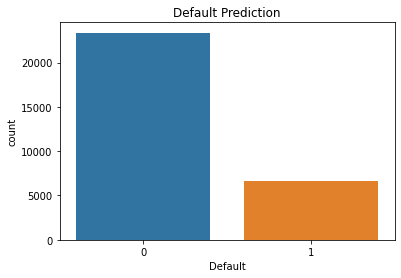

In [12]:
sns.countplot(df['Default'])
plt.title("Default Prediction")

In [13]:
df['Default'].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

In [14]:
df['Default'].value_counts(normalize=True)*100

0    77.88
1    22.12
Name: Default, dtype: float64

**--> As we can see above Outcome ,we can say that dataset is imbalanced. And defaulters present in dataset are only 22.12**


**<span style="color:red">Majority Values:- 77.88%**

**<span style="color:red">Minority Values:- 22.12%**

## Checking For Numerical And Categorical Columns

In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numeric_df=df[numeric_features]

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_df=df[categorical_features]

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 24 numerical features : ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default']

We have 0 categorical features : []


**As We Can See there are no Categorical features. and all the features are Numerical features**

### Numerical Features Are Of Two Types
* Discreate features
* Continues features

**1. Checking for Discreate features** 

In [16]:
discrete_features=[features for features in df.columns if len(df[features].unique())<=22]
discrete_features

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'Default']

**--> Which contains Float values(float64).**

**2. Checking for Continuous features

In [17]:
continues_features=[features for features in df.columns if features not in discrete_features]
continues_features

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

**-->Which contains Integers Values(int64).**

## SEX, EDUCATION, MARRIAGE

Dealing with these 3 features first

* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)

In [18]:
df['MARRIAGE'].replace({0:3},inplace=True)
df['EDUCATION'].replace({0:4,5:4,6:4},inplace=True)

In [19]:
df['MARRIAGE']=df['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others'})
df['EDUCATION']=df['EDUCATION'].replace({1:'Graduate school',2:'University',3:'High school',4:'Others'})
df['SEX']=df['SEX'].replace({1:'Male', 2:'Female'})

### SEX

In [20]:
df['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

Text(0.5, 1.0, 'Male Vs Female')

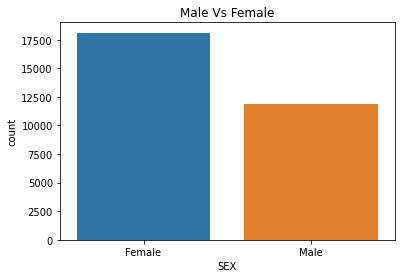

In [21]:
sns.countplot(df['SEX'])
plt.title("Male Vs Female")

In [22]:
def bar_plot(feature):
    plt.figure(figsize=(14,7))
    ax = sns.barplot(x = feature, y = "Default", data = df, palette ='mako', ci = None)

    plt.xlabel(f'{feature}', fontsize= 12)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='red', rotation=90, xytext=(0, 20),
                 textcoords='offset points')
    plt.show()

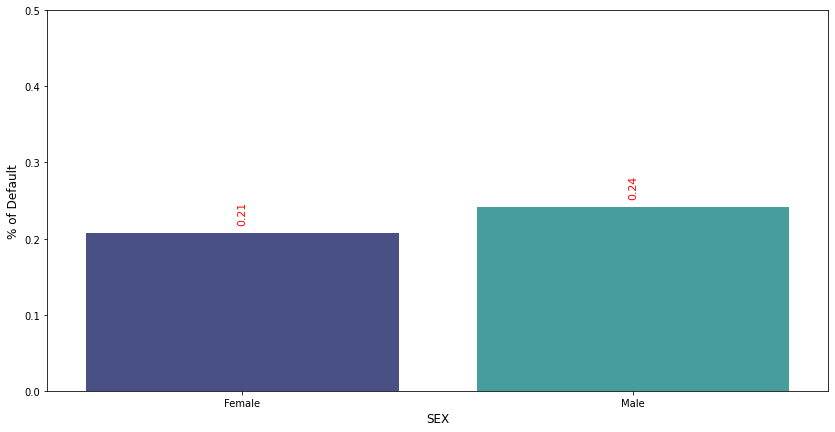

In [23]:
bar_plot("SEX")

### MARRIAGE

In [24]:
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64

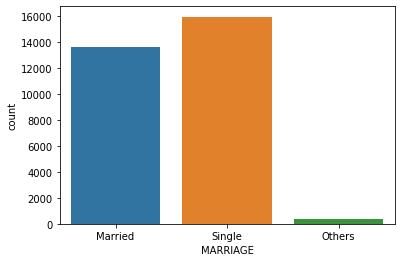

In [25]:
sns.countplot(df['MARRIAGE'])

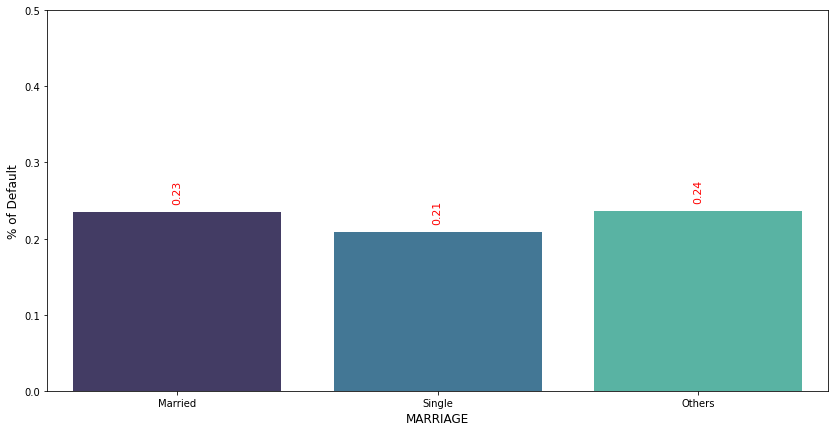

In [26]:
bar_plot("MARRIAGE")

### EDUCATION

In [27]:
df['EDUCATION'].value_counts()

University         14030
Graduate school    10585
High school         4917
Others               468
Name: EDUCATION, dtype: int64

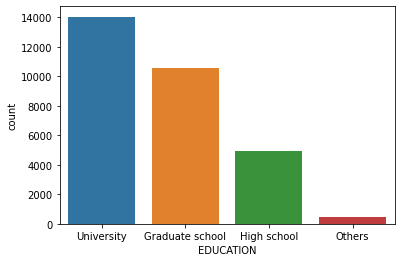

In [28]:
sns.countplot(df["EDUCATION"])

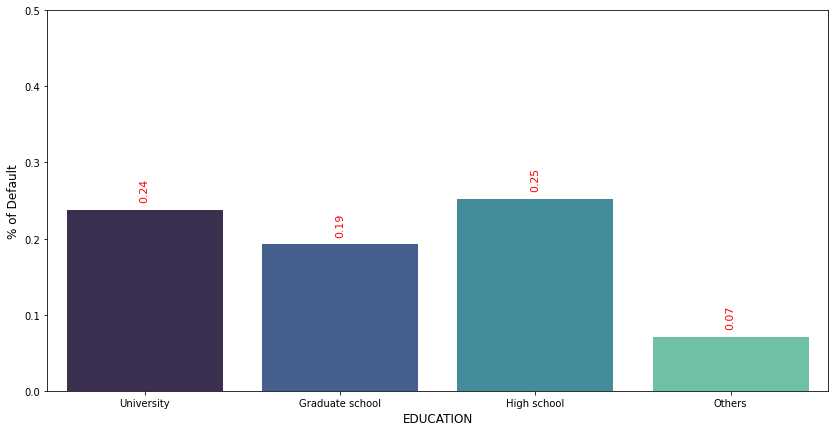

In [29]:
bar_plot("EDUCATION")

In [30]:
df['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [31]:
df['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [32]:
df['PAY_3'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [33]:
for i in range(1,7):
    PAY='PAY_'+str(i)
    df[PAY]=df[PAY].replace({-1:0})
    df[PAY]=df[PAY].replace({-2:0})

In [34]:
df['PAY_1'].value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

In each of the six PAY_X columns,the status code -1 means that payment was made on time and the code 1 means that payment was delayed by one month. The codes 2 through 8 represent delays in payment by two through eight months, respectively. And 9 means that payment was delayed by nine or more months.
so -1 and -2 have repalced to 0 because payment was paid already.

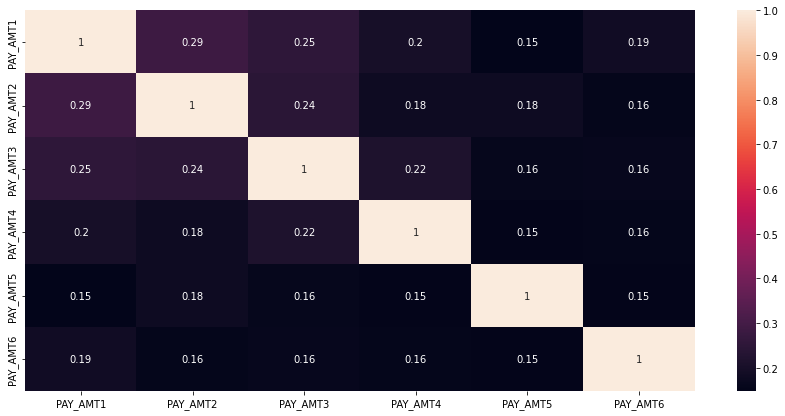

In [85]:
Pay=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].corr()
sns.heatmap(Pay,annot=True)
plt.rcParams['figure.figsize']=(8,4)

Aa we can see most of the columns in PAY_X are correlated with each it is impossible to delete any of the column because of that we will reduce model performance.

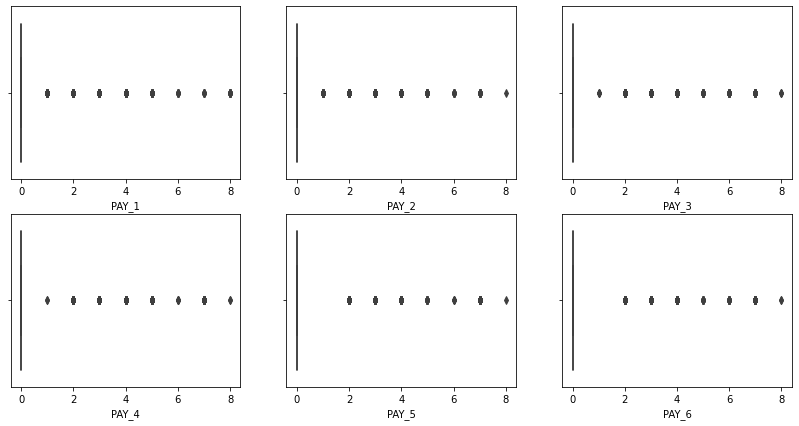

In [36]:
Pay_features=df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
plt.figure(figsize=(14,7))
for i,col in enumerate(Pay_features.columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(Pay_features[col])

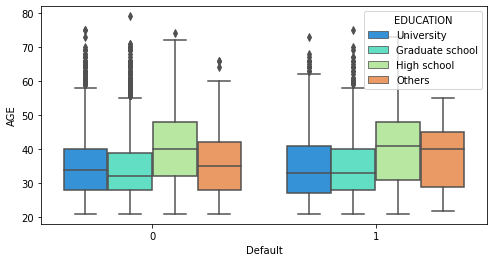

In [37]:
sns.boxplot(x='Default',hue='EDUCATION', y='AGE',data=df,palette="rainbow")
plt.rcParams['figure.figsize']=(8,4)

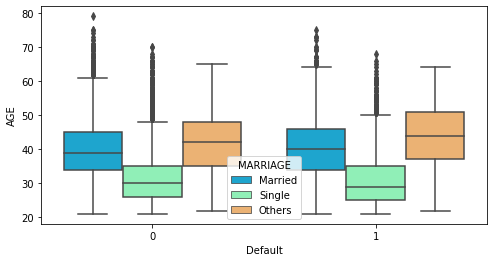

In [38]:
sns.boxplot(x='Default',hue='MARRIAGE', y='AGE',data=df,palette="rainbow")

#### LIMIT_BAL

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

In [39]:
df['LIMIT_BAL'].value_counts()

50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
730000.0        2
1000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64

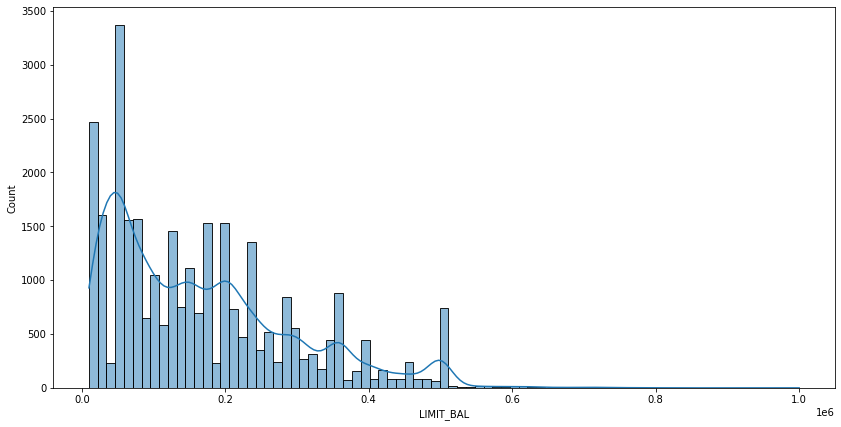

In [40]:
plt.figure(figsize=(14,7))
sns.histplot(x=df['LIMIT_BAL'],kde=True)
plt.show()

LIMIT_BAL Value ranges from o to 0.5

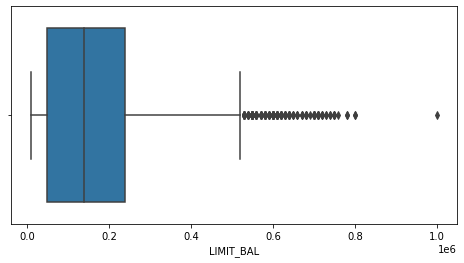

In [41]:
sns.boxplot(df['LIMIT_BAL'])

In [42]:
df['LIMIT_BAL'].describe().T

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

### Finding Outliers

In [43]:
outliers = []
def Finding_outliers(df):
    df = sorted(df)
    Q1 = np.percentile(df,25)
    Q3 = np.percentile(df,75)
    IQR = Q3-Q1
    Lower_bound=Q1-(1.5*IQR)
    Upper_bound=Q3+(1.5*IQR)
    for i in df:
        if (i<Lower_bound or i>Upper_bound):
            outliers.append(i)
    return outliers

In [44]:
outliers=Finding_outliers(df["LIMIT_BAL"])

In [45]:
len(outliers)

167

In [46]:
median = np.median(df['LIMIT_BAL'])# Replace with median
for i in outliers:
    c = np.where(df['LIMIT_BAL']==i, median, df['LIMIT_BAL'])
print("New array: ",c)
#dataset['LIMIT_BAL']=c

New array:  [ 20000. 120000.  90000. ...  30000.  80000.  50000.]


In [47]:
len(c)

30000

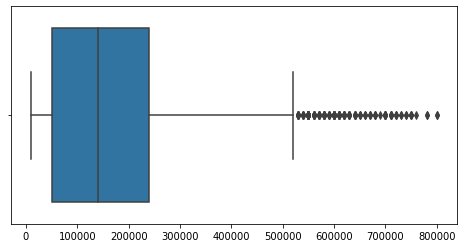

In [48]:
sns.boxplot(c)

In [49]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [50]:
#Computing 10th, 90th percentiles and replacing the outliers
sample=df['LIMIT_BAL']
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
print("New array:",b)

30000.0 360000.0
New array: [ 30000. 120000.  90000. ...  30000.  80000.  50000.]


In [51]:
len(b)

30000

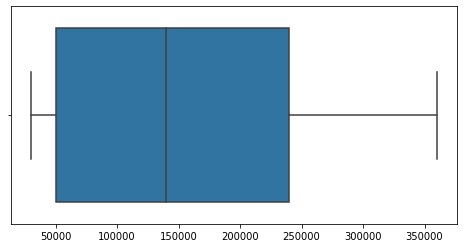

In [52]:
sns.boxplot(b)

In [53]:
df['Limit_bin'] = pd.cut(df['LIMIT_BAL'],bins=[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000],
labels = ['5000-50000','50000-100000','100000-150000','150000-200000','200000-300000','300000-400000','400000-500000','500000-1100000'])

In [54]:
df['Limit_bin'].value_counts()

5000-50000        7676
200000-300000     5059
50000-100000      4822
150000-200000     3978
100000-150000     3902
300000-400000     2759
400000-500000     1598
500000-1100000     206
Name: Limit_bin, dtype: int64

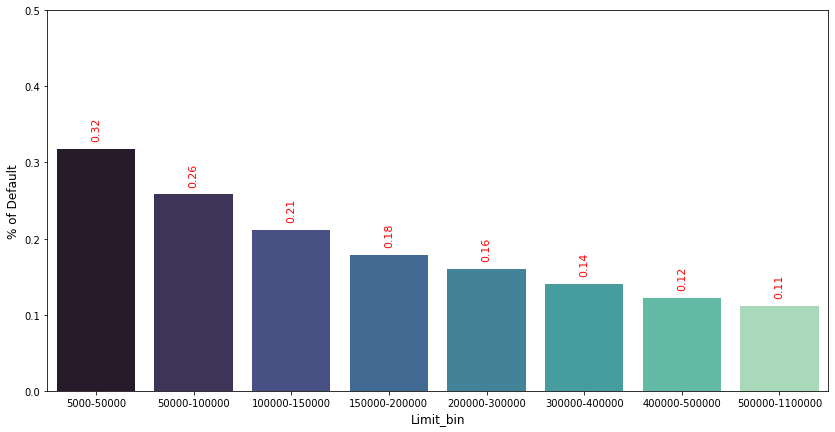

In [55]:
bar_plot('Limit_bin')


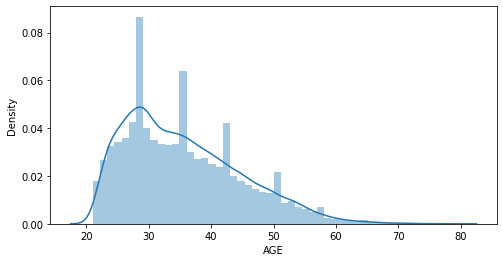

<Figure size 1008x504 with 0 Axes>

In [56]:
sns.distplot(df['AGE'])
plt.figure(figsize=(14,7))
plt.show()

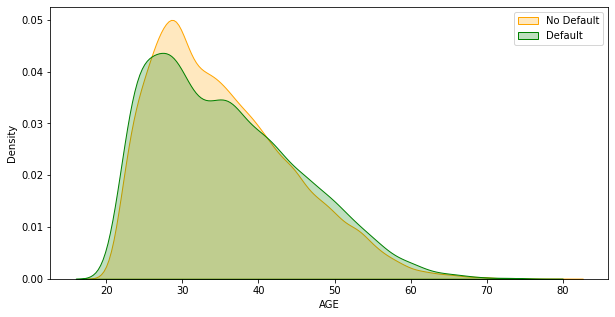

In [57]:
plt.figure(figsize=(10,5))

sns.kdeplot(df.loc[(df['Default'] == 0), 'AGE'], label = 'No Default', shade = True,color="orange")
sns.kdeplot(df.loc[(df['Default'] == 1), 'AGE'], label = 'Default', shade = True,color='green')
plt.legend()
plt.show()

In [58]:
df["AGE"].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [59]:
df['Age_bin']=pd.cut(df["AGE"],bins=[20,25,30,35,40,50,60,80],labels=['20-25','25-30','30-35','35-40','40-50','50-60','60-80'])
df['Age_bin'].value_counts()

25-30    7142
40-50    6005
30-35    5796
35-40    4917
20-25    3871
50-60    1997
60-80     272
Name: Age_bin, dtype: int64

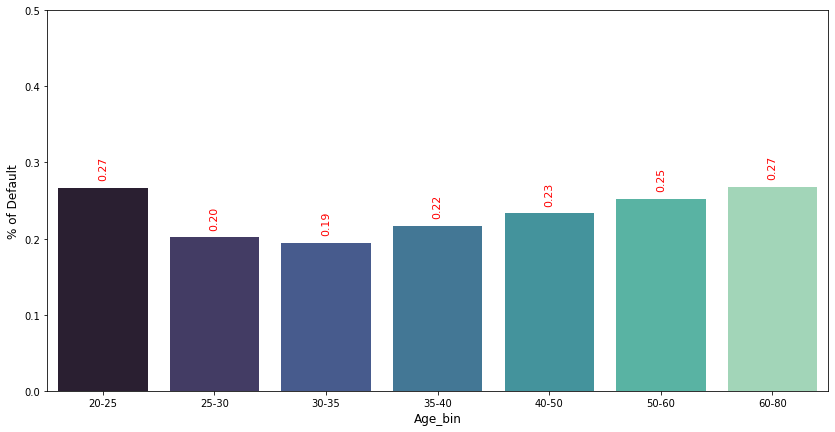

In [60]:
bar_plot('Age_bin')

As we can see the Person Age between 30-35 has less percent of Defaulters and Person Age between 20-25 has more Percent of Defaulters

In [61]:
Bill_features=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()
Bill_features

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [62]:
df['BILL_AMT1'].value_counts()

0.0         2008
390.0        244
780.0         76
326.0         72
316.0         63
            ... 
11636.0        1
146034.0       1
20817.0        1
1351.0         1
47929.0        1
Name: BILL_AMT1, Length: 22723, dtype: int64

In [63]:
df['BILL_AMT1'].describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

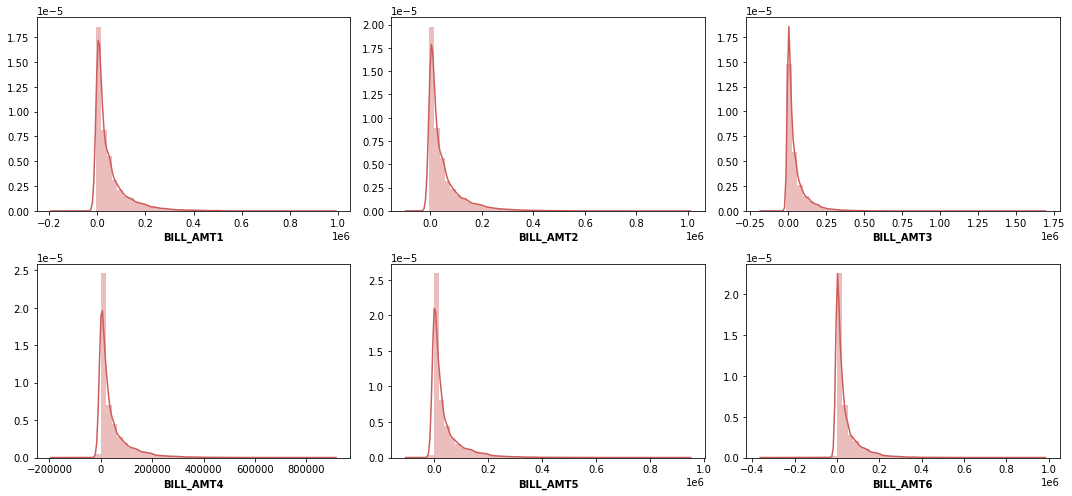

In [64]:
Bill_features=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
plt.figure(figsize=(15, 7))
for i, col in enumerate(Bill_features):
    plt.subplot(2, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.ylabel("")
    plt.tight_layout()
plt.show()

In [65]:
df['BILL_AMT1_bin'] = df['BILL_AMT1'].copy()
df['BILL_AMT2_bin'] = df['BILL_AMT2'].copy()
df['BILL_AMT3_bin'] = df['BILL_AMT3'].copy()
df['BILL_AMT4_bin'] = df['BILL_AMT4'].copy()
df['BILL_AMT5_bin'] = df['BILL_AMT5'].copy()
df['BILL_AMT6_bin'] = df['BILL_AMT6'].copy()

In [66]:
Bill_Amt_Bins=['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

for i,col in enumerate(Bill_Amt_Bins):
    df[col]=pd.cut(df[Bill_features[i]],
    bins=[-350000,-1,0,25000, 75000, 200000, 2000000],
    labels=['0<', '=0', '0-25k', '25k-75k', '75k-200k','>200k'])
    

In [67]:
df['BILL_AMT1_bin'].value_counts()

0-25k       12965
25k-75k      7656
75k-200k     5258
=0           2008
>200k        1523
0<            590
Name: BILL_AMT1_bin, dtype: int64

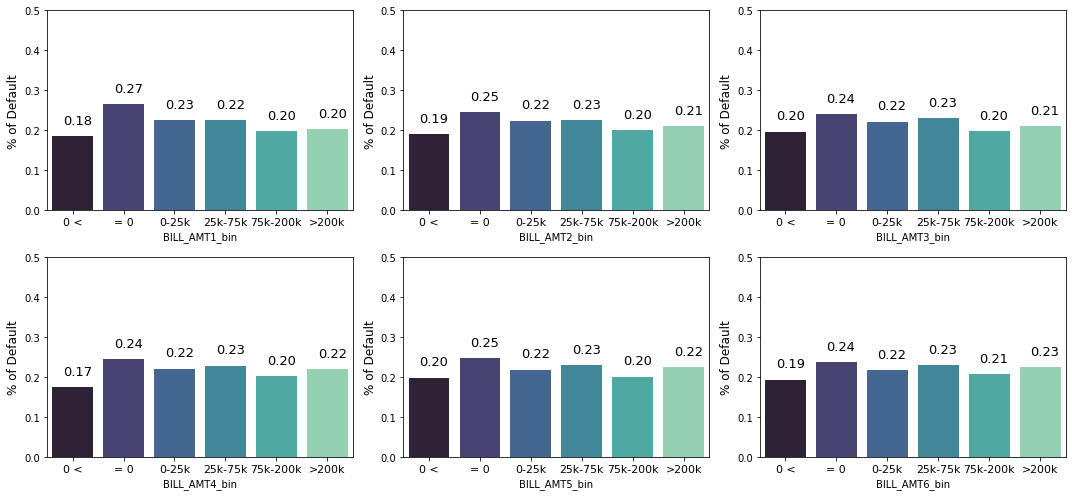

In [68]:
plt.figure(figsize=(15,7))

for i,col in enumerate(Bill_Amt_Bins):    
    plt.subplot(2,3,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'mako', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

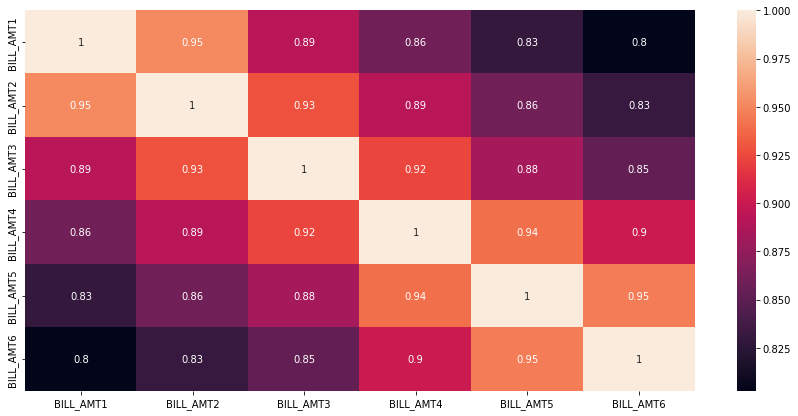

In [84]:
Bill_features=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].corr()
sns.heatmap(Bill_features,annot=True)
plt.show()

As We Can see there is high correalation between each other so we need to drop last 5 Bill_AMT columns.Drops highly correlated features to escape curse of dimensionality.

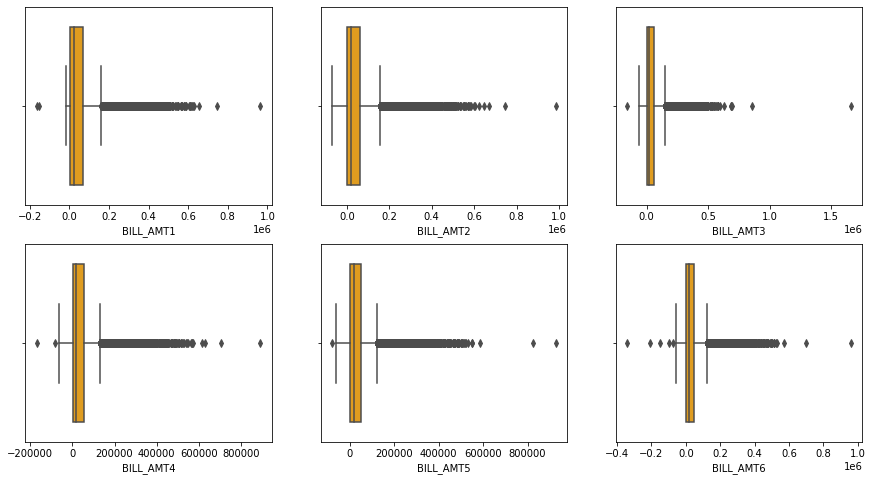

In [70]:
Bill_features=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
plt.figure(figsize=(15,8))
for i,col in enumerate(Bill_features.columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(Bill_features[col],color="orange")

In [71]:
PAY_AMT_featurs=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()
PAY_AMT_featurs

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


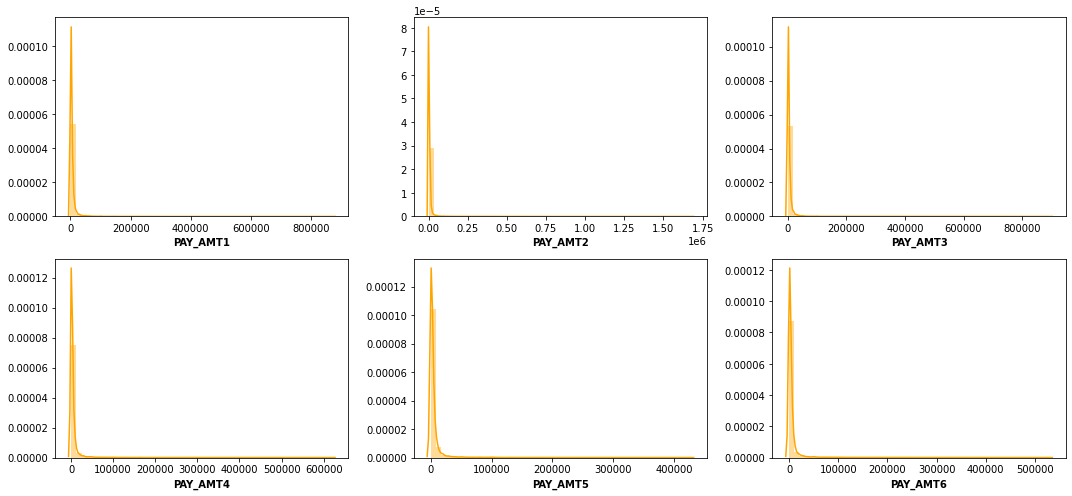

In [72]:
PAY_AMT_featurs=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
plt.figure(figsize=(15, 7))
for i, col in enumerate(PAY_AMT_featurs):
    plt.subplot(2, 3, i+1)
    sns.distplot(x=df[col], color='orange')
    plt.xlabel(col, weight='bold')
    plt.ylabel("")
    plt.tight_layout()
plt.show()

In [73]:
df['PAY_AMT1_bin'] = df['PAY_AMT1'].copy()
df['PAY_AMT2_bin'] = df['PAY_AMT2'].copy()
df['PAY_AMT3_bin'] = df['PAY_AMT3'].copy()
df['PAY_AMT4_bin'] = df['PAY_AMT4'].copy()
df['PAY_AMT5_bin'] = df['PAY_AMT5'].copy()
df['PAY_AMT6_bin'] = df['PAY_AMT6'].copy()

In [74]:
Pay_Amtx_Bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (Pay_Amtx_Bins):
    df[col] = pd.cut(df[PAY_AMT_featurs[i]],
                bins=[-1, 0, 25000, 50000, 100000, 2000000],
                labels=['0<', '0-25k', '25k-50k', '50k-100k', '100k-2000k'])

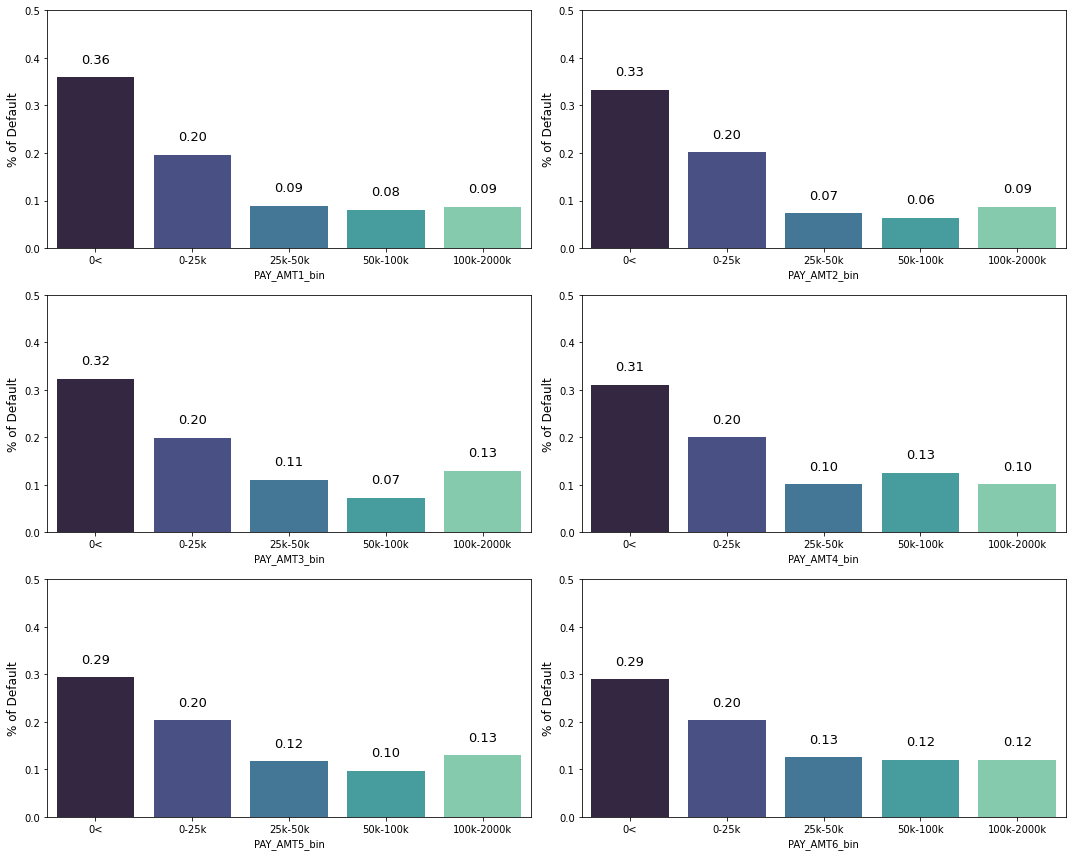

In [76]:
plt.figure(figsize=(15,12))
for i,col in enumerate(Pay_Amtx_Bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'mako', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)
plt.show()

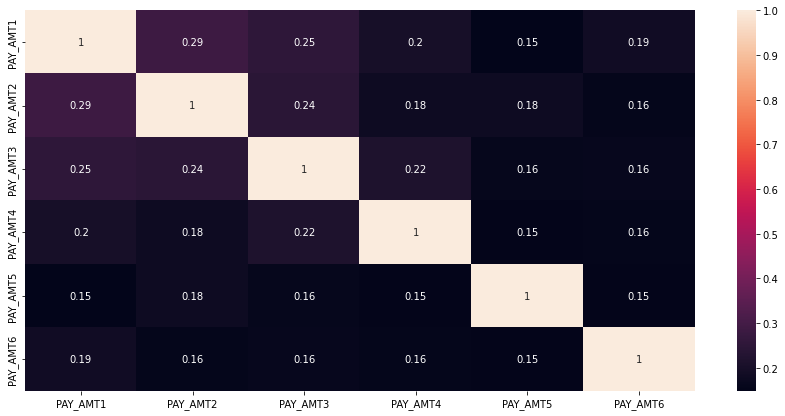

In [83]:
PAY_AMT_featurs=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].corr()
sns.heatmap(PAY_AMT_featurs,annot=True)
plt.show()


As we can see there is no correlation between Above features.

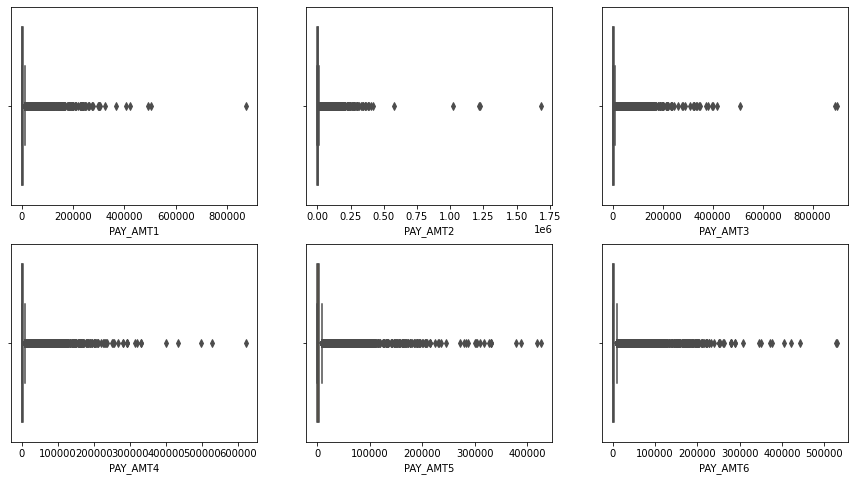

In [78]:
PAY_AMT_featurs=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
plt.figure(figsize=(15,8))
for i,col in enumerate(PAY_AMT_featurs.columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(PAY_AMT_featurs[col],color='orange')

In [79]:
df_new =df.copy().drop(['AGE','LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],axis=1)
df_new.head()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Default,...,BILL_AMT3_bin,BILL_AMT4_bin,BILL_AMT5_bin,BILL_AMT6_bin,PAY_AMT1_bin,PAY_AMT2_bin,PAY_AMT3_bin,PAY_AMT4_bin,PAY_AMT5_bin,PAY_AMT6_bin
0,Female,University,Married,2,2,0,0,0,0,1,...,0-25k,=0,=0,=0,0<,0-25k,0<,0<,0<,0<
1,Female,University,Single,0,2,0,0,0,2,1,...,0-25k,0-25k,0-25k,0-25k,0<,0-25k,0-25k,0-25k,0<,0-25k
2,Female,University,Single,0,0,0,0,0,0,0,...,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k
3,Female,University,Married,0,0,0,0,0,0,0,...,25k-75k,25k-75k,25k-75k,25k-75k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k
4,Male,University,Married,0,0,0,0,0,0,0,...,25k-75k,0-25k,0-25k,0-25k,0-25k,25k-50k,0-25k,0-25k,0-25k,0-25k


In [80]:
df_old=df.copy().drop(['Age_bin','Limit_bin','BILL_AMT1_bin','BILL_AMT2_bin','BILL_AMT3_bin','BILL_AMT4_bin','BILL_AMT5_bin','BILL_AMT6_bin','PAY_AMT1_bin','PAY_AMT2_bin','PAY_AMT3_bin','PAY_AMT4_bin','PAY_AMT5_bin','PAY_AMT6_bin'],axis=1)
df_old.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,Female,University,Married,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


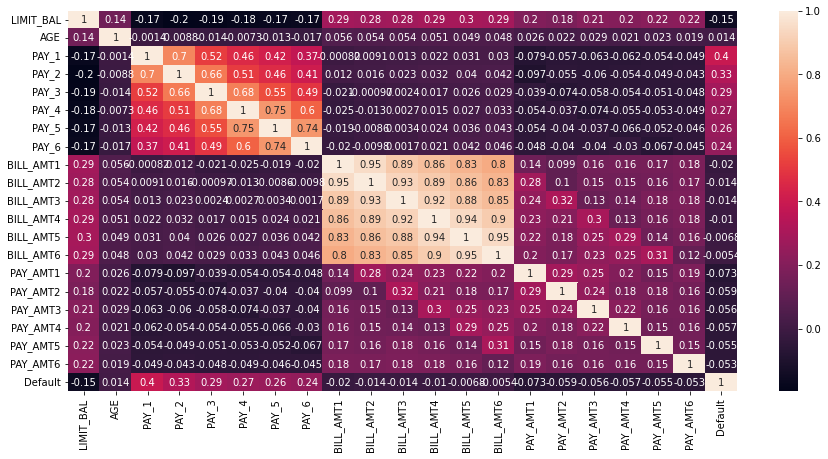

In [82]:
sns.heatmap(df_old.corr(),annot=True)
plt.rcParams['figure.figsize']=(15,7)
plt.show()

As we can see there is high correlation in column BIL_AMT(1-6) but we can't drop the columns because we will loss the data. 